# statsmodels

# ANOVA 

In [1]:
import pandas as pd

df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df.head(2)

,plant_var,height,canopy_vol
0,A,20.0,0.7
1,A,22.0,0.8


In [3]:
from dfply import *

df>>group_by(X.plant_var)>>summarize(n=X['height'].count(),mean=X['height'].mean(),std=X['height'].std())

,plant_var,n,mean,std
0,A,10,18.90,2.923088
1,B,10,16.54,1.920185
2,C,10,3.05,1.039498
3,D,10,9.35,2.106735


In [4]:
df>>group_by(X.plant_var)>>summarize(n=X['canopy_vol'].count(),mean=X['canopy_vol'].mean(),std=X['canopy_vol'].std())

,plant_var,n,mean,std
0,A,10,0.784,0.121308
1,B,10,0.608,0.096816
2,C,10,0.272,0.143279
3,D,10,0.474,0.094540


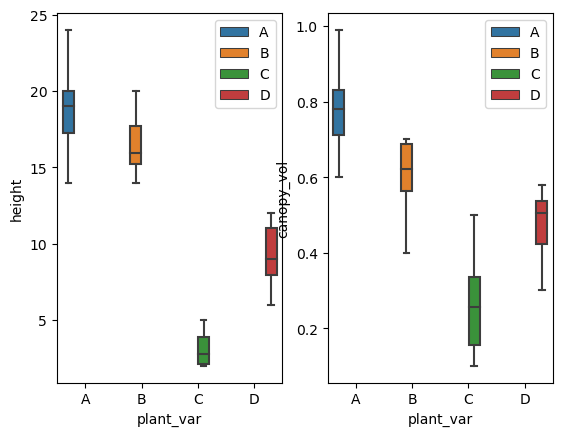

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

figs,axs=plt.subplots(ncols=2)

sns.boxplot(data=df,x='plant_var',y='height',hue=df.plant_var.tolist(),ax=axs[0])
sns.boxplot(data=df,x='plant_var',y='canopy_vol',hue=df.plant_var.tolist(),ax=axs[1])

plt.show()

In [8]:
from statsmodels.multivariate.manova import MANOVA

fit=MANOVA.from_formula('height+canopy_vol~plant_var',data=df)

print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-